In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
# r2_score is a matric commonly used for regression.
# It's also called coefficient of determination
# See https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
# Values close to 1 are good

### Function to split data into training and test

In [2]:
def split_data(X, y, split_ratio=0.8):
    split = int(split_ratio*X.shape[0])
    X_train = X[:split,...]
    y_train = y[:split]
    X_test = X[split:,...]
    y_test = y[split:]
    return X_train, y_train, X_test, y_test

### One dimensional synthetic data

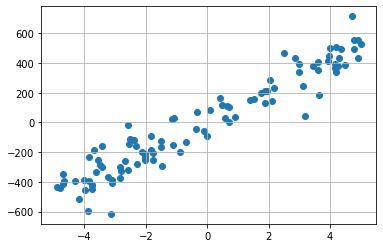

In [3]:
x = 10* (np.random.rand(100)-0.5)
y = 100* (x + np.random.randn(len(x))) # linear function of x plus Gaussian noise
plt.scatter(x,y)
plt.grid()

In [4]:
X_train, y_train, X_test, y_test = split_data(x,y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80,) (80,) (20,) (20,)


In [5]:
# Linear Regression
w_opt = X_train.T @ y_train / (X_train.T @ X_train)
y_predict = w_opt * X_test
print("r2_score is: {}".format(r2_score(y_test,y_predict)))

r2_score is: 0.9624575326989607


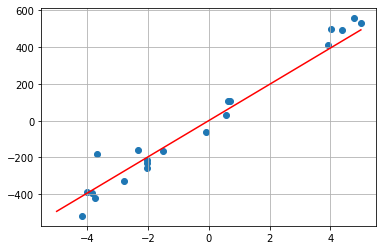

In [6]:
# Plot linear prediction of the testing data
plt.figure()
plt.scatter(X_test, y_test)
t = np.linspace(-5,5,10000)
plt.plot(t, w_opt*t, color = 'r')
plt.grid()

### One dimensional affine data

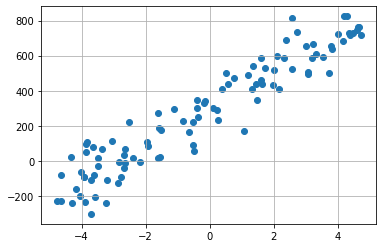

In [7]:
x = 10* (np.random.rand(100)-0.5)
y = 100* (x + np.random.randn(len(x))) + 300 # affine function of x plus Gaussian noise
plt.scatter(x,y)
plt.grid()

In [8]:
X_train, y_train, X_test, y_test = split_data(x,y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80,) (80,) (20,) (20,)


In [9]:
# Linear Regression
w_opt = X_train.T @ y_train / (X_train.T @ X_train)
y_predict = X_test * w_opt
print("r2_score is: {}.. it is very low..".format(r2_score(y_test,y_predict)))

r2_score is: 0.3428137660308137.. it is very low..


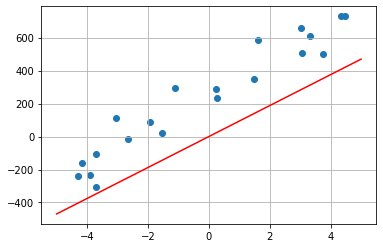

In [10]:
# Plot linear prediction of the testing data
plt.figure()
plt.scatter(X_test, y_test)
t = np.linspace(-5,5,10000)
plt.plot(t, w_opt*t, color = 'r')
plt.grid()

### Use augmented $\tilde{X}$

In [11]:
X = np.concatenate((x.reshape(100,1), np.ones((100,1))), axis=1 )
X_train, y_train, X_test, y_test = split_data(X,y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80, 2) (80,) (20, 2) (20,)


In [12]:
# Linear Regression
w_opt = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print("Optimal weights are: {}".format(w_opt))
y_predict = X_test @ w_opt
print("r2_score is: {}".format(r2_score(y_test,y_predict)))

Optimal weights are: [100.56323969 308.97829364]
r2_score is: 0.8974225952839036


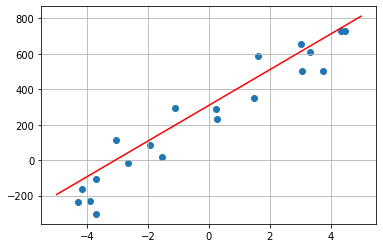

In [13]:
# Plot linear prediction of the testing data
plt.figure()
plt.scatter(X_test[:,0], y_test)
t = np.linspace(-5,5,10000)
plt.plot(t, w_opt[0]*t + w_opt[1], color = 'r')
plt.grid()

### How about non-linear function? e.g. quadratic relationship between x and y

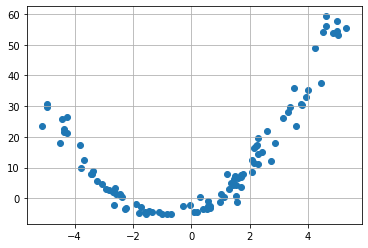

In [14]:
x = 10*np.random.rand(100)-5
y = 2*x**2 + 3*x - 4
x += 0.3*np.random.randn(len(x))
plt.scatter(x,y)
plt.grid()

(80, 2) (80,) (20, 2) (20,)
Optimal weights are: [ 3.12983955 11.91223014]


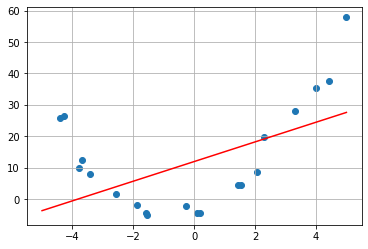

In [16]:
X = np.concatenate((x.reshape(100,1), np.ones((100,1))), axis=1 )
X_train, y_train, X_test, y_test = split_data(X,y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Linear Regression
w_opt = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print("Optimal weights are: {}".format(w_opt))
y_predict = X_test @ w_opt

# Plot linear prediction of the testing data
plt.figure()
plt.scatter(X_test[:,0], y_test)
t = np.linspace(-5,5,10000)
plt.plot(t, w_opt[0]*t + w_opt[1], color = 'r')
plt.grid()

### Feature extension (to quadratic)

(80, 3) (80,) (20, 3) (20,)
Optimal weights are: [ 1.87495163  2.91045662 -3.58743032]


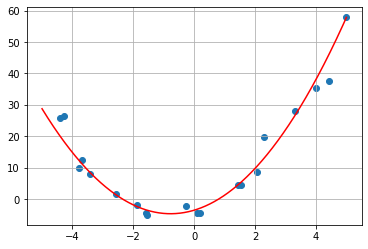

In [17]:
X = np.concatenate(((x**2).reshape(100,1), x.reshape(100,1), np.ones((100,1))), axis=1)

X_train, y_train, X_test, y_test = split_data(X,y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Linear Regression
w_opt = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print("Optimal weights are: {}".format(w_opt))
y_predict = X_test @ w_opt

# Plot linear prediction of the testing data
plt.figure()
plt.scatter(X_test[:,1], y_test)
t = np.linspace(-5,5,10000)
plt.plot(t, w_opt[0]*(t**2) + w_opt[1] * t + w_opt[2], color = 'r')
plt.grid()

### Solve the optimization problem with Stochastic Gradient Descent

(4000, 3) (4000,) (1000, 3) (1000,)


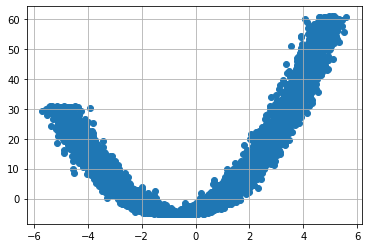

In [18]:
x = 10*np.random.rand(5000)-5 # More samples
y = 2*x**2 + 3*x - 4
x += 0.3*np.random.randn(len(x))
plt.scatter(x,y)
plt.grid()

X = np.concatenate(((x**2).reshape(5000,1), x.reshape(5000,1), np.ones((5000,1))), axis=1)

X_train, y_train, X_test, y_test = split_data(X,y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [19]:
# SGD hyperparameters
batch_size = 20
epochs = 100
w = np.zeros_like(X_train[0,:]) # initialize weights 
eta = 0.01 # Step size: converges faster if larger


In [20]:
# SGD Runs 
for _ in range(epochs):
    for i in range(X_train.shape[0]//batch_size):
        X_train_batch = X_train[i:i+batch_size,...]
        y_train_batch = y_train[i:i+batch_size]
        w = w - eta * (-X_train_batch.T@y_train_batch + X_train_batch.T@X_train_batch@w)/batch_size
w_opt = w
print("Optimal weights are: {}".format(w_opt))

Optimal weights are: [ 1.67868335  2.53473574 -3.78995255]


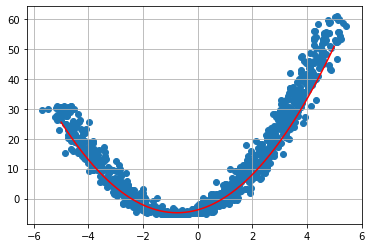

In [21]:
y_predict = X_test @ w_opt

# Plot linear prediction of the testing data
plt.figure()
plt.scatter(X_test[:,1], y_test)
t = np.linspace(-5,5,10000)
plt.plot(t, w_opt[0]*(t**2) + w_opt[1] * t + w_opt[2], color = 'r')
plt.grid()

### Work on real data with scikit-learn

In [22]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

#### Diabetes dataset: 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

In [23]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target
print('data shape:', data.shape, 'target shape:', target.shape)

#input parameters
start_feat = 2
num_feats = 2

#choose features
diabetes_X = data[:,start_feat:start_feat+num_feats]
print('chosen feature shape:', diabetes_X.shape)

data shape: (442, 10) target shape: (442,)
chosen feature shape: (442, 2)


In [24]:
X_train, y_train, X_test, y_test = split_data(diabetes_X,target)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 2) (353,) (89, 2) (89,)


#### Using scikit-learn's least square, note the *fit_intercept* argument

**1. Create linear regression object**

In [25]:
regr = linear_model.LinearRegression(fit_intercept=True)

**2. Train the model using the training sets**

In [26]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**3. Make predictions using the testing set**

In [27]:
y_predict = regr.predict(X_test)
print('Predicted test y:', y_predict)
print('Actual test y:', y_test)

Predicted test y: [ 93.28117413 196.72904452 149.69990776 119.16513064 198.96070255
  73.49489847 168.21523449 176.65571546 156.48283751 262.36146368
 132.02415151 139.72461087 116.06071918 257.06017381 295.44973186
 159.30019557 167.9513675   83.97953293 162.29346496 127.01991158
 141.27102     99.4020414  188.93903283 204.98202096 166.66882536
 151.74406125 128.65427638 194.45261037  52.37290464 192.57596829
 125.17485584 129.33952528 154.43868402 113.05585658 137.0299881
 152.59362827 121.90612625 229.78253308  71.86053368 126.82081384
  98.61724363 187.50376578 142.05581777 118.39192608 137.27226535
 152.14225674 188.47606809 221.91615893  94.45257419 116.6464192
 228.54636377 221.34205211 282.23569501  55.57686498 207.84415518
 150.53788157 163.06666952 132.34438788 183.27432709 244.13319036
 141.56966662 155.65486024 140.60895752 252.78276558 182.41316686
 122.36909099  87.85714897 122.4238637  173.1647017  234.24584914
 130.30023438 153.68866587  89.1280979  140.12120965 154.362

In [29]:
# The coefficients
print('Coefficients:', regr.coef_, 'intercept:', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predict))
# R2 score: 1 is perfect prediction
print('r2_score: %.2f' % r2_score(y_test, y_predict))

Coefficients: [809.7454639  365.78652882] intercept: 151.86150991129261
Mean squared error: 3568.44
r2_score: 0.44


### Plot prediction in 3-D

Text(0.5, 0, 'Y')

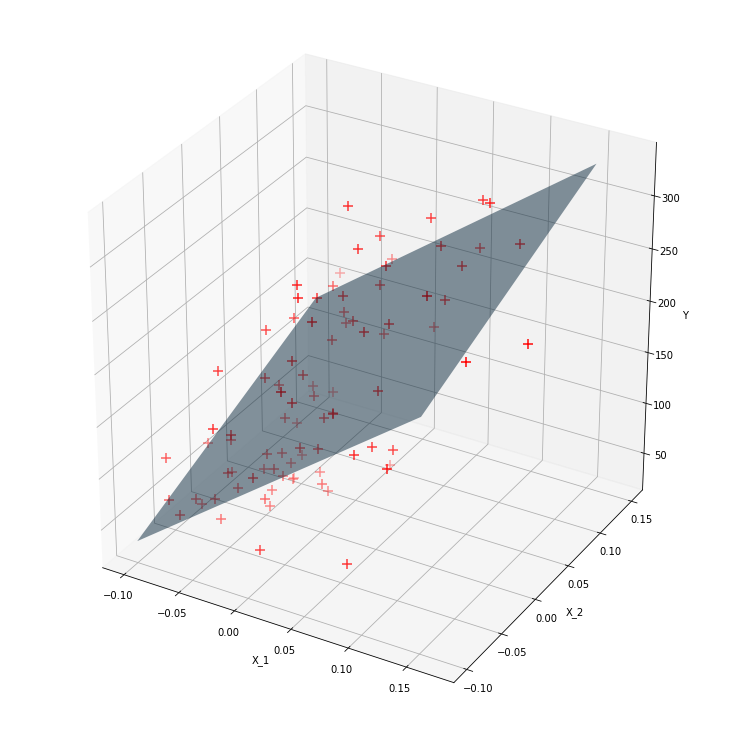

In [30]:
fig = plt.figure(figsize=(10,10))
plt.clf()
ax = Axes3D(fig)

ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='r', marker='+', s=100)
    
ax.plot_surface(np.array([[-.1, -.1], [.15, .15]]),
                np.array([[-.1, .15], [-.1, .15]]),
                regr.predict(np.array([[-.1, -.1, .15, .15],
                                    [-.1, .15, -.1, .15]]).T
                        ).reshape((2, 2)),alpha=.5)
    
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')